In [7]:
%reload_ext autoreload
%autoreload 2
import sys
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, log_loss, confusion_matrix
load_dotenv()

ROOT = os.getenv("ROOT")
sys.path.append(ROOT)
assert ROOT is not None, "Please create a .env file and specify your ROOT path."
from src.processing import DataProcessor

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/lucanyckees/Desktop/my-repos/recommendation_system/venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <F2F42313-BF4F-3B95-A853-AE1DE94D4C87> /Users/lucanyckees/Desktop/my-repos/recommendation_system/venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [2]:
data_processor = DataProcessor()
data_processor._load(category="All_beauty", frac=0.01)
data_processor._process_reviews(clean_text=False)
data_processor._embedd_reviews_and_split(embedding="tf-idf")

NameError: name 'DataProcessor' is not defined

In [5]:
xgb = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False)
xgb.fit(data_processor.X_train, data_processor.y_train)
y_pred = xgb.predict(data_processor.X_test)

NameError: name 'XGBClassifier' is not defined

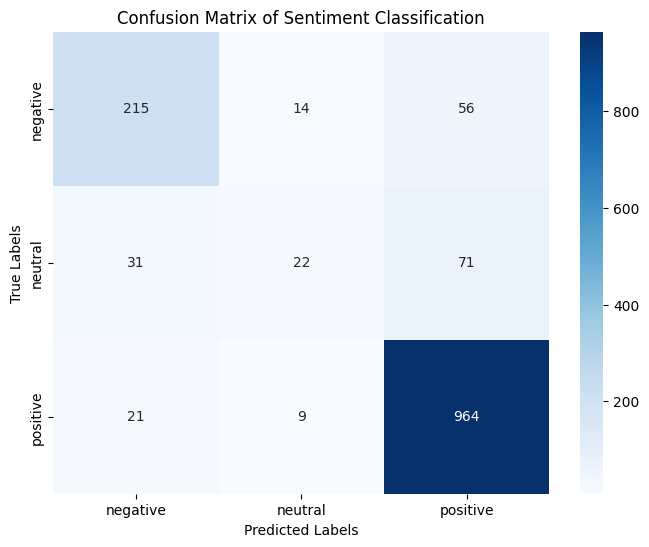

In [15]:
# Create a confusion matrix
conf_matrix = confusion_matrix(data_processor.y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Sentiment Classification")
plt.show()

In [16]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.81      0.75      0.78       285
     neutral       0.49      0.18      0.26       124
    positive       0.88      0.97      0.92       994

    accuracy                           0.86      1403
   macro avg       0.73      0.63      0.65      1403
weighted avg       0.83      0.86      0.84      1403



In [17]:
y_pred_proba = xgb.predict_proba(X_test_tfidf)
log_loss_value = log_loss(y_test, y_pred_proba)
print(f"Log Loss (Cross Entropy): {log_loss_value}")

Log Loss (Cross Entropy): 0.39912544479695994
